<a href="https://colab.research.google.com/github/Stefaniazl/venta-de-autos-usados/blob/main/Desafio_AlgoritmoML_MVP_Stefania_Zapata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vehiculos de Segunda mano en venta**

Un automóvil de **segunda mano**, usado o de ocasión, es un vehículo que anteriormente perteneció a uno o más dueños. Este tipo de vehículos se pueden encontrar tanto de particulares como en outlets, franquicia e incluso concesionarios de coches independientes, empresas de alquiler de vehículos, casas de subastas, etc. Algunos vendedores ofrecen precios no negociables, certificado de uso e incluso garantías.

En España, el sector de la automoción representa el 10% del PIB (producto interior bruto) y el 18% del total de las exportaciones. Además, proporciona cerca de 2 millones de puestos de trabajo, a lo largo de toda la geografía nacional, siendo un importante generador de empleo en muchas regiones, más allá de las grandes ciudades.

### **Problema comercial**

Tras haber pasado la que quizás haya podido ser la crisis económica más dura en España, las ventas de vehículos de segunda mano, se han visto alteradas desde el punto de vista de la antigüedad de los vehículos, principal característica que define al mercado de vehículos de ocasión, dándose grandes diferencias y comportamientos según el tramo de edad que se analice. 

**Buscamos:**

* Determinar el precio a largo plazo del vehiculo de acuerdo a sus características.
* Top 10 de modelos de coches en venta (marca + modelo)
* Fecha media de fabricacion de los vehiculos por marca
* ¿Cuál es el precio medio de venta por marca?

### **Fuente de información**

Para trabajar en este proyecto hare uso de la base de Datos que se encuentra disponible en [Kaggle](https://www.kaggle.com/datasets/datamarket/venta-de-coches)

Este Dataset cuenta con informacion que utilizaremos en las siguientes visualizaciones entre ellas podemos encontrar: la provincia en la que se encuentra el anuncinate del vehiculo, el precio del vehiculo, el modelo, el kilometraje y el año en que fue fabricado.

Las características de este conjunto de datos son las siguientes:

*   **Volumen estimado:** 300.000 registros cada día
*   **Histórico:** desde noviembre de 2020 hasta 2021

### **Documentación de las columnas**

**Color:** Color del vehículo.

**currency:** Moneda en la que está definido el precio del vehículo (Euro).

**date:** Fecha de extracción de la información.

**dealer_address:** Dirección del anunciante.

**dealer_city:** Ciudad del anunciante.

**dealer_country_code:** Código de país del anunciante

**dealer_description:** Descripción del anunciante.

**dealer_is_professional:** Determina si el anunciante es o no profesional.

**dealer_name:** Vendedor del vehículo (Particular o concesionario).

**dealer_registered_at:** Fecha de registro del anunciante en la plataforma.

**dealer_website:** Página web del anunciante.

**dealer_zip_code:** Código postal del anunciante.

**description:** Descripción presente en el anuncio del vehículo.

**doors:** Número de puertas del vehículo.

**fuel:** Tipo de combustible del vehículo (diésel, gasolina, eléctrico, híbrido).

**is_professional:** Indica si el vendedor es profesional (un concesionario).

**kms:** Kilometraje del vehículo.

**location:** Ciudad en la que se ha publicado el anuncio.

**make:** Marca del vehículo.

**model:** Modelo del vehículo.

**photos:** Número de fotos del vehículo disponibles en el anuncio.

**power:** Potencia del vehículo.

**price:** Precio de venta del vehículo.

**publish_date:** Fecha de publicación del anuncio.

**shift:** Tipo de cambio (Automático/Manual).

**update_date:** Fecha de actualización del anuncio.

**vehicle_type:** Tipo de vehículo: coche, moto...

**version:** Versión del vehículo.

**year:** Año de fabricación del vehículo.

# **Cargamos librerías**

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [61]:
#Cargamos las librerías
import pandas as pd;
import pandas_profiling;
import plotly.express as px;
import matplotlib.pyplot as plt;
import seaborn as sns;
import numpy as np;
import missingno as msno;
from statistics import mean;
from wordcloud import WordCloud;


In [62]:
# Importamos el archivo csv con el que trabajaremos
from google.colab import files
 
uploaded = files.upload()


Saving coches-sm.csv to coches-sm (1).csv


In [63]:
#Visualizamos el Dataset
df = pd.read_csv('coches-sm.csv')
df

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,730210734bfbe1d3df878d5df71246f2,9881bcdd5a0ad4733037b3fb25e69c3a,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,...,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,...,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,9000.0,Gasolina,2019.0,21422,...,5,Manual,Gris / Plata,17,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,NaN,Gasolina,2013.0,47900,...,5,Automático,Gris / Plata (Antracita),20,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:53,2021-01-15 00:00:00


In [64]:
print(f'\tEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas. \n')

	El dataset tiene 50000 filas y 21 columnas. 



Con la visualizacion anterior podemos apreciar que contamos con 50000 Datos y 21 columnas con distinta información que seran usados en el proyecto.


---



#**Data Wrangling**

Se realizo una examinacion de los datos, y se han realizado los ajustes de limpieza necesarios para dejarlos listos para análisis.

Detallaremos los cambios a continuación:<br>
* Se eliminaron 3 columnas, 
  * Dos columnas, la mayoria de datos nulos
  * Una columna con informacion que no requeriamos para el modelado del proyecto.
* Se detectaron y eliminaron datos nulos en el resto de las columnas
* Se realizo un cambio en el tipo de datos en la variable **Year** de *Float a int* para poder realizar conteo y sacar promedio del mismo.
* Se mantuvo el df original y se realizo una copia para trabajar las visualizaciones con los datos limpios
* Realizamos una segunda copia para los algoritmos de aprendizaje automático.

El conjunto de datos resultantes tiene 49.237 publicaciones de vehiculos y 18 columnas.

# **Analisis exploratorio de los datos**

Vemos variables, el tipo de dato (numéricas o de texto) y la cantidad de nulls que poseen.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

A continuacion utilizare la librería de missingno para visualizar con graficos los valores faltantes, voy a realizar **dos visualizaciones** en donde la primera nos indica donde estan los faltantes exactamente yendo desde el dato 1 al 50000 y la segunda nos muestra el total de valores completos, mostrando está el espacio total faltante. 

<Axes: >

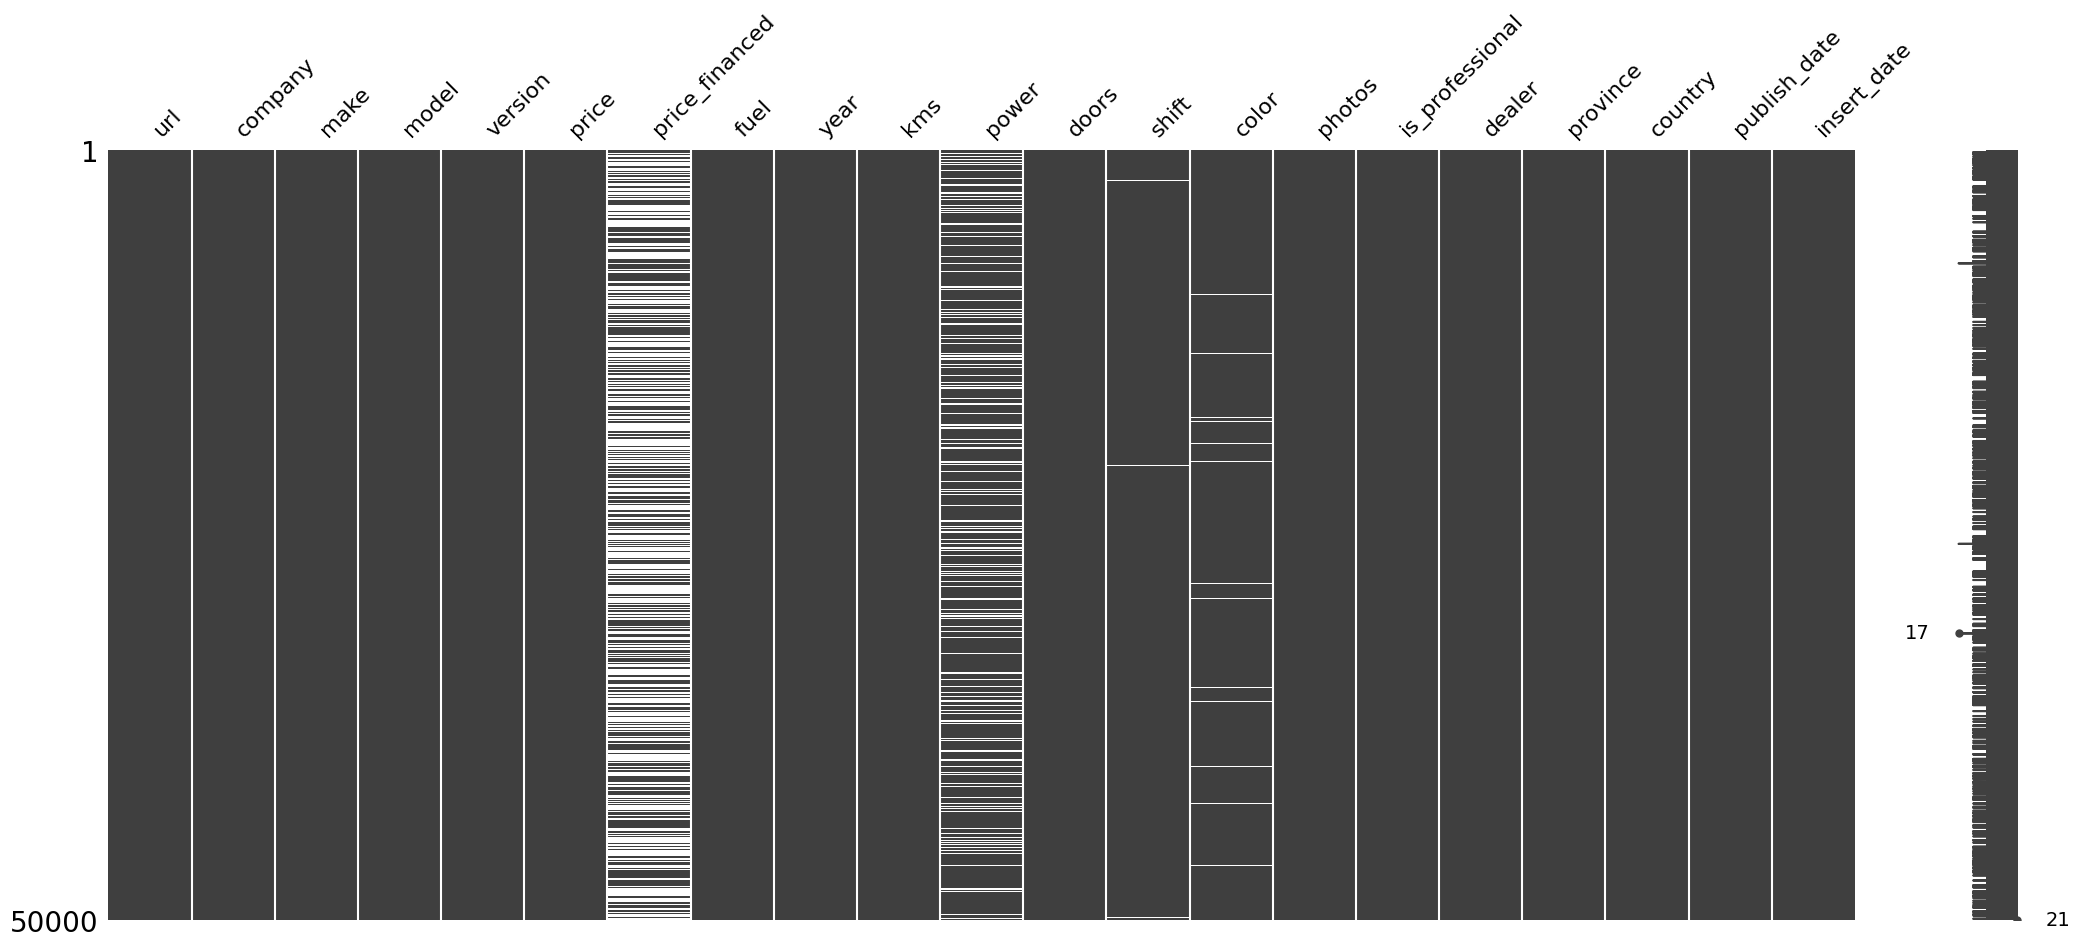

In [66]:
msno.matrix(df)

<Axes: >

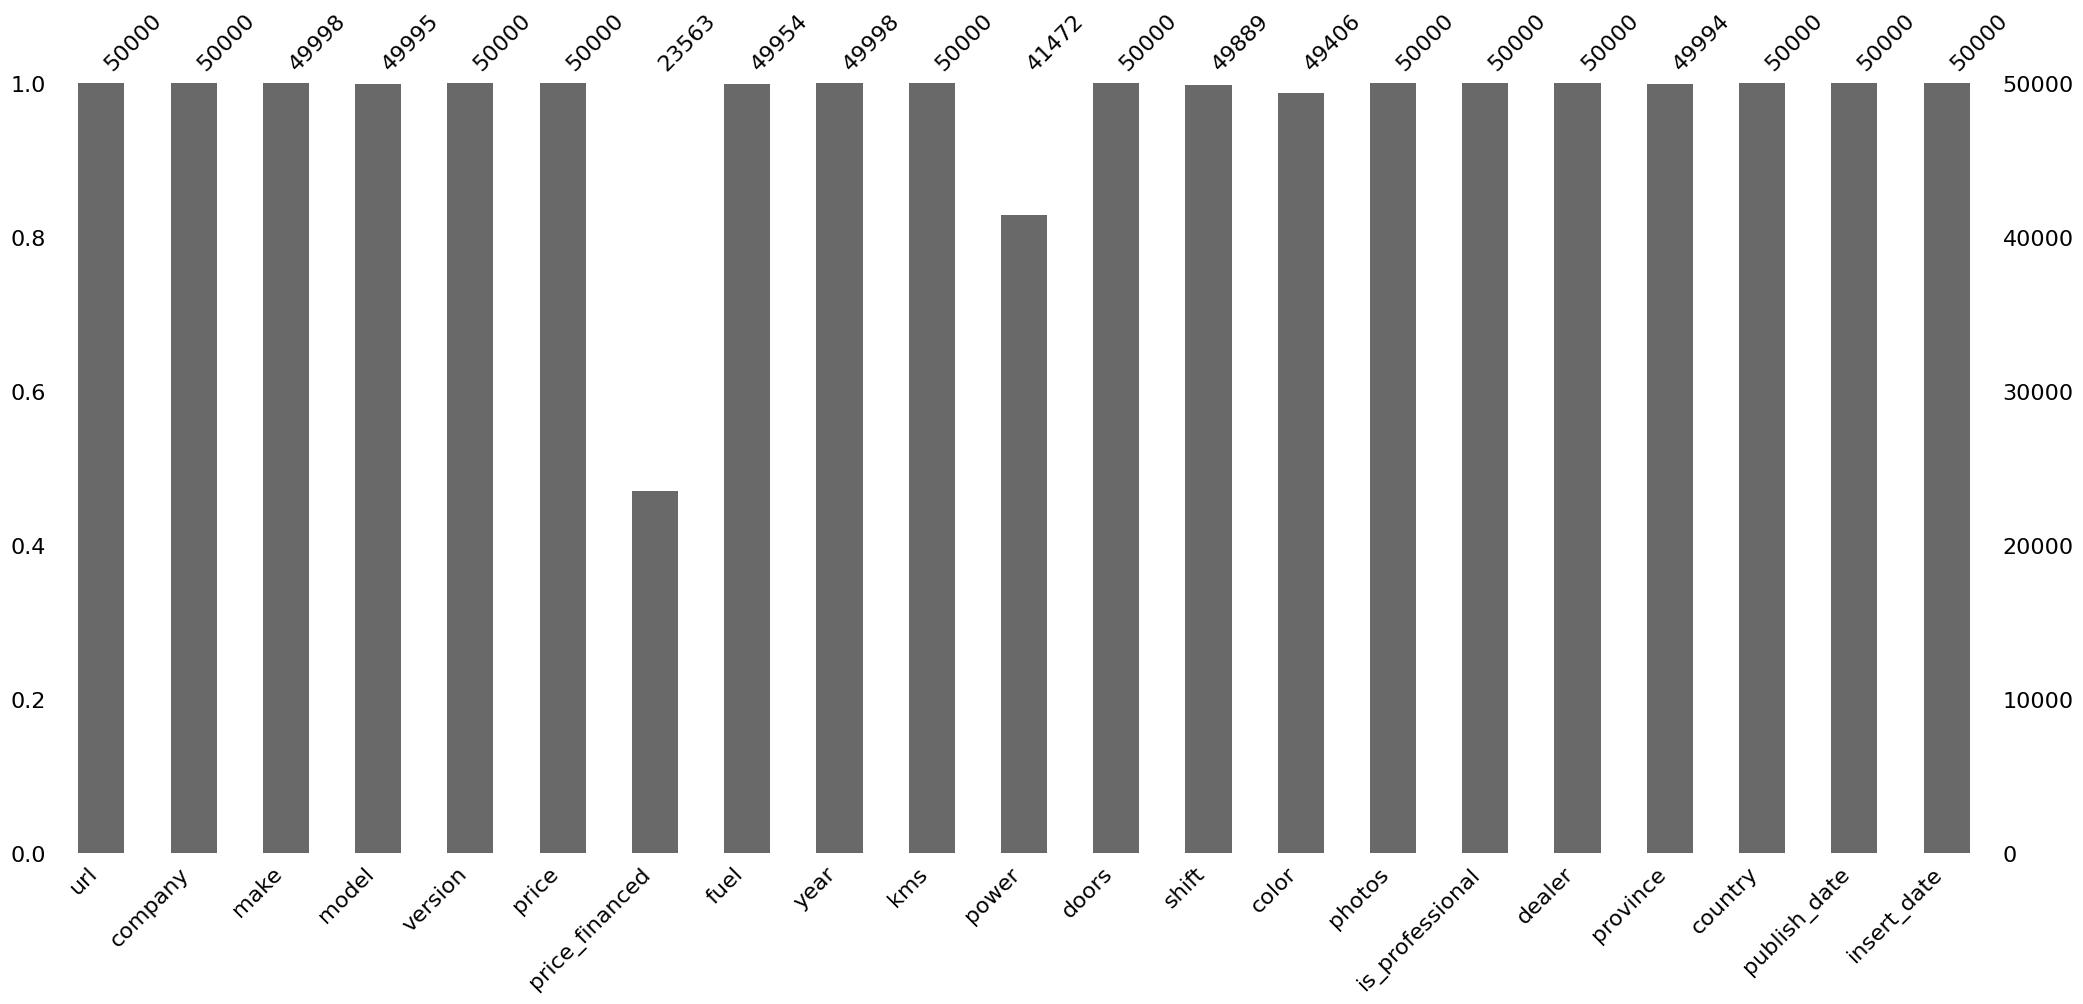

In [67]:
msno.bar(df)

In [68]:
df.isnull().sum()

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
dtype: int64

In [69]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
price_financed,price_financed,52.874
power,power,17.056
color,color,1.188
shift,shift,0.222
fuel,fuel,0.092
province,province,0.012
model,model,0.010
make,make,0.004
year,year,0.004
photos,photos,0.000


Podemos ver en los datos anteriores que tenemos un porcentaje de faltantes con un  52% en lo que corresponde a precio de financiamiento y un 17% en power del vehiculo publicado por lo cual tomando en cuanta los datos que necesito para trabajar el modelo pensado eliminare la columna que afectaria el modelo ya que tiene la mitad de datos faltantes y ademas eliminare la columna de photos que no sera usada en los datos que necesito para este modelo.

In [70]:
df_1 = df.drop(['price_financed', 'power', 'photos'], axis=1)

In [71]:
print(f'\tEl dataset tiene {df_1.shape[0]} filas y {df_1.shape[1]} columnas. \n')

	El dataset tiene 50000 filas y 18 columnas. 



Despues de eliminar las **columnas** con mayores **faltantes** de datos procedemos a eliminar las filas con el restante de datos nulls para asi poder hacer un mejor uso de los datos restantes.

In [72]:
df_2 = df_1.dropna(axis=0, inplace=False)

In [73]:
print(f'\tEl dataset tiene {df_2.shape[0]} filas y {df_2.shape[1]} columnas. \n')

	El dataset tiene 49237 filas y 18 columnas. 



In [74]:
df_2.isnull().sum()

url                0
company            0
make               0
model              0
version            0
price              0
fuel               0
year               0
kms                0
doors              0
shift              0
color              0
is_professional    0
dealer             0
province           0
country            0
publish_date       0
insert_date        0
dtype: int64

Ahora podemos ver que no tenemos ningun dato falante y podemos realizar el cambio de tipo de dato sobre **Year** ya que este es tipo float y lo pasaremos a un tipo int.

In [75]:
df_2 = df_2.astype({"year": int})

Ahora podremos ver las modificaciones aplicadas:

In [76]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49237 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              49237 non-null  object
 1   company          49237 non-null  object
 2   make             49237 non-null  object
 3   model            49237 non-null  object
 4   version          49237 non-null  object
 5   price            49237 non-null  int64 
 6   fuel             49237 non-null  object
 7   year             49237 non-null  int64 
 8   kms              49237 non-null  int64 
 9   doors            49237 non-null  int64 
 10  shift            49237 non-null  object
 11  color            49237 non-null  object
 12  is_professional  49237 non-null  bool  
 13  dealer           49237 non-null  object
 14  province         49237 non-null  object
 15  country          49237 non-null  object
 16  publish_date     49237 non-null  object
 17  insert_date      49237 non-null

### Ahora contamos con **18 Columnas** y ningun dato nulo.

In [77]:
#Veo cada columna por nombre
columnas = df_2.columns[1:]
columnas

Index(['company', 'make', 'model', 'version', 'price', 'fuel', 'year', 'kms',
       'doors', 'shift', 'color', 'is_professional', 'dealer', 'province',
       'country', 'publish_date', 'insert_date'],
      dtype='object')

A continuación podremos apreciar los valores cuantitativos de algunas variables. Podremos ver el valor promedio, minimo, maximo y otros.

In [78]:
#Descripcion de los datos
df_2.describe()

,price,year,kms,doors
count,49237.000000,49237.000000,4.923700e+04,49237.000000
mean,15286.479842,2012.379775,1.154533e+05,4.505920
std,16555.697552,6.646521,1.062254e+05,0.867953
min,300.000000,1970.000000,0.000000e+00,2.000000
25%,5500.000000,2007.000000,3.800000e+04,4.000000
50%,11900.000000,2015.000000,9.950000e+04,5.000000
75%,19900.000000,2018.000000,1.720000e+05,5.000000
max,549900.000000,2021.000000,5.000000e+06,5.000000


Podemos ver que el valor maximo de venta es de **$549.900** y el minimo de **300**

In [79]:
#Aqui vemos el total de modelos por marca y año.
df_n=df_2[['make','year','model']].groupby(by=['make','year']).count().reset_index()
df_n.head()

,make,year,model
0,ABARTH,2009,1
1,ABARTH,2011,3
2,ABARTH,2012,4
3,ABARTH,2013,1
4,ABARTH,2014,6


In [ ]:
profile = pandas_profiling.ProfileReport(df_2)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Algunos gráficos descriptivos**


Estuve organizando las marcas de los autos por cantidad de modelos, podemos ver que hay 4553 modelos de una misma marca es la que tiene mayor cantidad de modelos. Esto lo hice en forma decreciente para asi obtener un top 10 de las marcas mas publicadas pero no pude lograr ver la lista con los nombres de las marcas.

In [80]:
df_n1=df_2[['model','make']].groupby(by=['make']).count().reset_index()
df_n1

,make,model
0,ABARTH,96
1,ALFA ROMEO,297
2,ALPINE,1
3,ARO,1
4,ASTON MARTIN,15
...,...,...
68,TESLA,23
69,TOYOTA,1540
70,UMM,1
71,VOLKSWAGEN,4553


In [81]:
sorted(df_n1['model'], reverse=True)


[4553,
 4442,
 4175,
 3691,
 3265,
 3082,
 3067,
 2883,
 2802,
 2536,
 1619,
 1540,
 1357,
 1130,
 1106,
 814,
 805,
 592,
 561,
 513,
 485,
 459,
 336,
 327,
 297,
 296,
 278,
 267,
 245,
 221,
 213,
 196,
 125,
 123,
 98,
 96,
 77,
 72,
 62,
 59,
 48,
 44,
 36,
 31,
 28,
 25,
 23,
 15,
 15,
 14,
 11,
 11,
 11,
 10,
 8,
 8,
 7,
 4,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

Ahora gráficare los datos para traer informacion respecto al precio por, marca, año, kms, tipo.


---

Evaluando los datos podemos apreciar que hay gran diferencia en estos **encontrando outliers** en los precios de los vehiculos, por lo cual eliminare estos para que se puedan apreciar mejor los datos en los graficos.

In [82]:
df_2.drop(df_2[(df_2['price'] >350000)].index, inplace=True)

# **Story Telling**

A continuación vamos a ver que auto es el mas publicado segun su **tipo de cambio**, esto nos lleva a verlo graficamente:

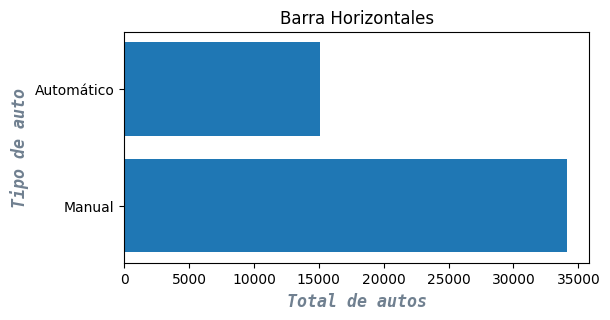

In [84]:
#Convierto la columna Shift a tipo str ya que no me permitia realizar el conteo porque tenia tipo float

df = df_2.astype({"shift": str})

x= df['shift'].unique()
y= df['shift'].value_counts().tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.barh(x, y)

fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'slategrey','size': 12} #Estilo de titulos
ax.set_title('Barra Horizontales')
ax.set_ylabel('Tipo de auto', fontdict=fuenteejes)
ax.set_xlabel('Total de autos', fontdict=fuenteejes)

plt.show()

Despues de observar el grafico podemos ver que el auto mas publicado es el de tipo de **cambio manual**

En el siguiente Grafico podremos visualizar una alta diferencia en los precios correspondientes a los autos de menor años de fabricación, puede esto ser influyente tambien por el tipo de auto, modelo o marca.

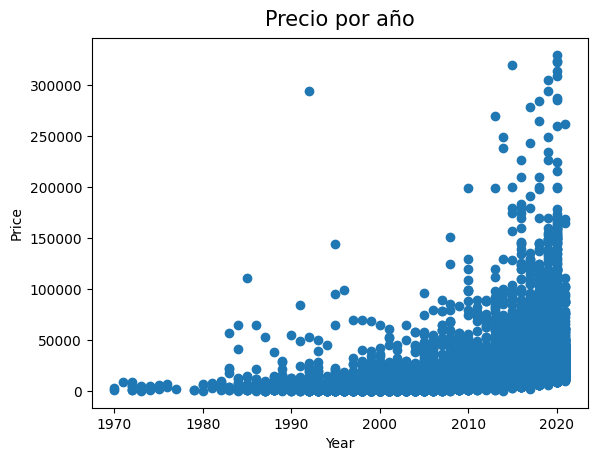

In [85]:
plt.scatter(df_2['year'],df_2['price'])
plt.title("Precio por año", fontsize=15, verticalalignment='bottom');
plt.xlabel("Year");
plt.ylabel("Price");

Como pudimos ver en el grafico anterior los autos con mayor precio de venta son los que tienen **menos años de Fabricacion** pero vamos a ver ahora como influye el modelo del auto segun las puertas del vehiculo.

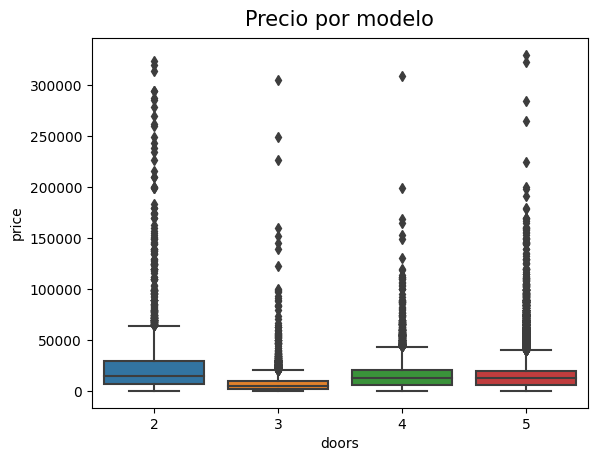

In [86]:
sns.boxplot(x='doors', y = 'price', data = df_2) 
plt.title("Precio por modelo", fontsize=15, verticalalignment='bottom');

En el **Boxplot** anterior podemos ver que los vehiculos de 2 puertas tienen un mayor valor en cuanto a precio se refiere que los mismos autos de 4 puertas que se puede apreciar que el costo es mucho menor siguiendo los autos de 3 puertas.

En el siguiente utilizare el modulo **statistics** para asi poder apreciar mejor el promedio sobre el precio de venta de los vehiculos publicados. Y podemos ver que este se encuentra sobre los **15.230 Euros**.

In [87]:
mean(df['price'])

15230.400345317896

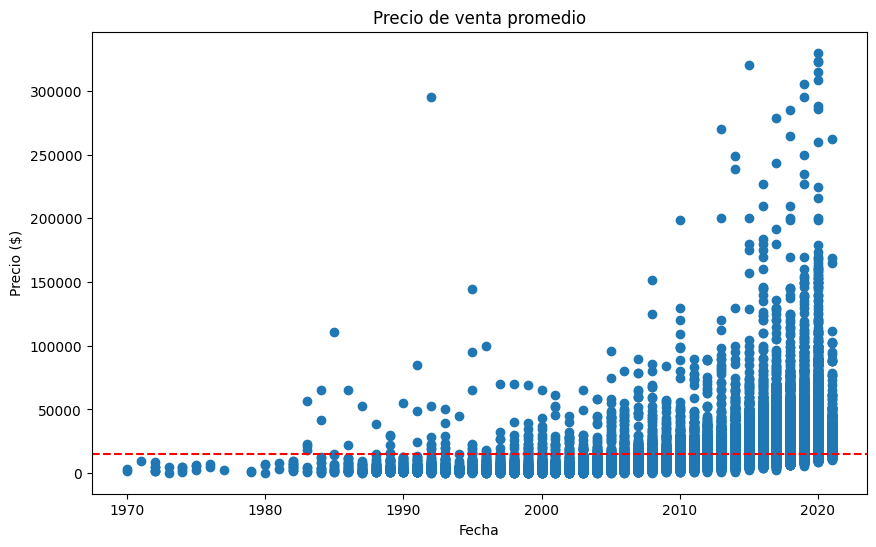

In [88]:
media = df_2['price'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(df['year'], df['price'], label='Precio de venta')

plt.axhline(y=media, color='r', linestyle='--', label='Media del precio')

plt.xlabel("Fecha")

plt.ylabel("Precio ($)")

plt.title("Precio de venta promedio")

plt.show()

Ya que tenemos el **precio promedio** por el total de vehiculos publicados podriamos ver el precio promedio por marca, entonces **¿Cual es el precio promedio por marca de Vehículo?**

In [89]:
marcas = df_2[['price','make']].groupby(by=['make']).mean().reset_index()
marcas

,make,price
0,ABARTH,19098.333333
1,ALFA ROMEO,13897.841751
2,ALPINE,66000.000000
3,ARO,1000.000000
4,ASTON MARTIN,89578.666667
...,...,...
68,TESLA,53672.956522
69,TOYOTA,12922.911688
70,UMM,8000.000000
71,VOLKSWAGEN,13240.178344


In [90]:
marcas = df_2.groupby("make")

marcas.describe().head()

price                                                         \
              count          mean           std      min      25%      50%   
make                                                                         
ABARTH         96.0  19098.333333   5718.376006   7900.0  15392.5  17845.0   
ALFA ROMEO    297.0  13897.841751  14018.978327    400.0   3500.0   7900.0   
ALPINE          1.0  66000.000000           NaN  66000.0  66000.0  66000.0   
ARO             1.0   1000.000000           NaN   1000.0   1000.0   1000.0   
ASTON MARTIN   15.0  89578.666667  51123.776530  43900.0  51900.0  89000.0   

                                    year               ...       kms  \
                    75%       max  count         mean  ...       75%   
make                                                   ...             
ABARTH         23644.25   30990.0   96.0  2017.312500  ...   49675.0   
ALFA ROMEO     19700.00   87000.0  297.0  2011.461279  ...  180000.0   
ALPINE         66000.00   66000.0    1.0  2019.000000  ...    9999.0   
ARO             1000.00    1000.0    1.0  2004.000000  ...   17000.0   
ASTON MARTIN  100950.00  227000.0   15.0  2011.266667  ...   71500.0   

                        doors                                                
                   max  count      mean       std  min   25%  50%  75%  max  
make                                                                         
ABARTH        160000.0   96.0  2.750000  0.435286  2.0  2.75  3.0  3.0  3.0  
ALFA ROMEO    430000.0  297.0  4.228956  0.851134  2.0  3.00  4.0  5.0  5.0  
ALPINE          9999.0    1.0  2.000000       NaN  2.0  2.00  2.0  2.0  2.0  
ARO            17000.0    1.0  5.000000       NaN  5.0  5.00  5.0  5.0  5.0  
ASTON MARTIN   83000.0   15.0  2.866667  1.187234  2.0  2.00  2.0  3.0  5.0  

[5 rows x 32 columns]

In [92]:
marcas.mean().sort_values(by="price",ascending=False).head(10)

<ipython-input-92-e8bf5f1ff49c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  marcas.mean().sort_values(by="price",ascending=False).head(10)


,price,year,kms,doors,is_professional
make,,,,,
LAMBORGHINI,209571.285714,2012.857143,29538.571429,2.000000,0.857143
FERRARI,156901.000000,2011.200000,40891.300000,2.100000,0.966667
BENTLEY,134285.720000,2011.320000,61928.280000,2.600000,0.880000
ASTON MARTIN,89578.666667,2011.266667,41901.800000,2.866667,0.933333
ALPINE,66000.000000,2019.000000,9999.000000,2.000000,1.000000
PORSCHE,59860.976471,2011.627451,97772.474510,3.898039,0.766667
MASERATI,57325.854839,2014.580645,63415.693548,4.096774,0.806452
TESLA,53672.956522,2017.608696,89471.739130,4.826087,0.782609
CORVETTE,43830.000000,2007.333333,49666.666667,2.666667,1.000000


In [93]:
marcas.count().sort_values(by="model",ascending=False).head(10)

,url,company,model,version,price,fuel,year,kms,doors,shift,color,is_professional,dealer,province,country,publish_date,insert_date
make,,,,,,,,,,,,,,,,,
VOLKSWAGEN,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553
BMW,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442,4442
MERCEDES-BENZ,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173
AUDI,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691
PEUGEOT,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265,3265
RENAULT,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082,3082
FORD,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067
OPEL,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883
CITROEN,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802,2802


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
text = " ".join(review for review in df_2.make)

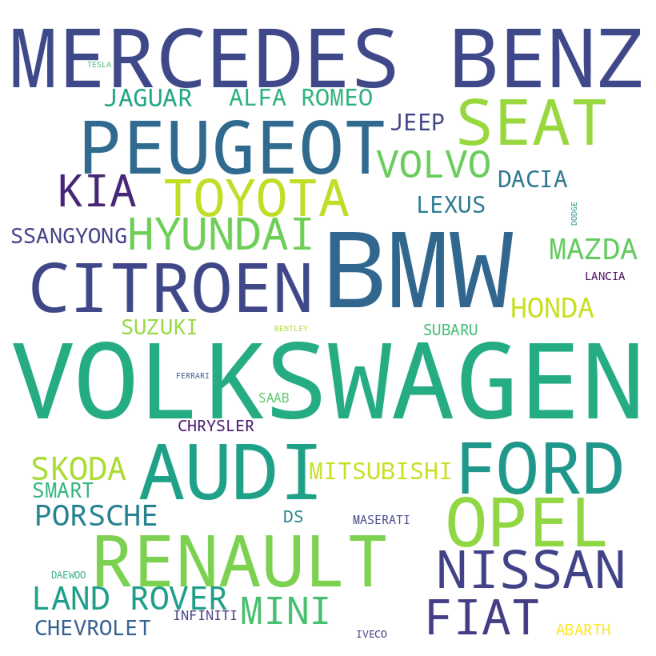

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

En el siguiente grafico de **Histograma** podremos visualizar la cantidad de autos publicados segun el año de fabricación y podemos ver que hay mayor cantidad a partir de los autos fabricados en el año 2017 al 2021.

Text(0, 0.5, 'Cantidad de autos Publicados')

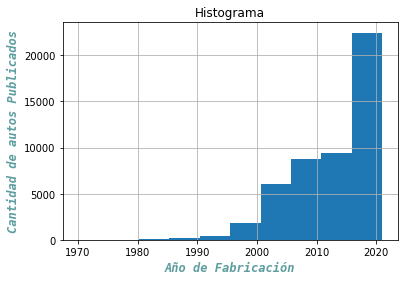

In [ ]:
df_2['year'].hist()
fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'cadetblue','size': 12}
plt.title('Histograma')
plt.xlabel('Año de Fabricación', fontdict=fuenteejes)
plt.ylabel('Cantidad de autos Publicados', fontdict=fuenteejes)

Podemos ver en este **Histograma** que tenemos una gran diferencia desde el año **1970 al 2000** por lo cual voy a eliminar datos en este rango de fecha para tener una mejor apreciación de los datos.

In [94]:
df_2.drop(df_2[(df_2['year'] <2000)].index, inplace=True)

Text(0, 0.5, 'Cantidad de autos Publicados')

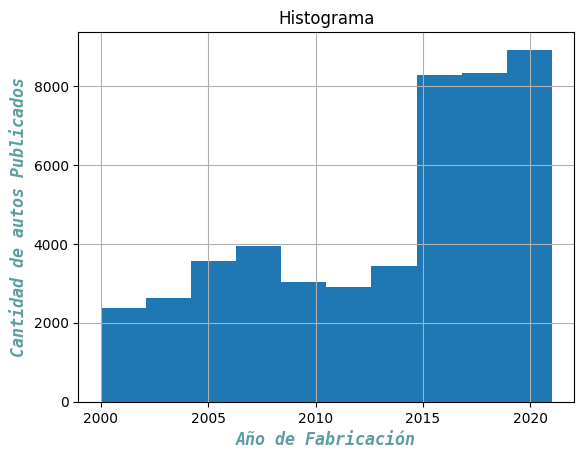

In [95]:
df_2['year'].hist()
fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'cadetblue','size': 12}
plt.title('Histograma')
plt.xlabel('Año de Fabricación', fontdict=fuenteejes)
plt.ylabel('Cantidad de autos Publicados', fontdict=fuenteejes)

En el siguiente gráfico **Scatter** podremos visualizar los kilometros que tienen los autos de acuerdo al año de fabricación, podemos observar que los autos con mas kilometros recorridos son los que estan entre el año 1998 y 2014

Text(0, 0.5, 'Kilometros recorridos')

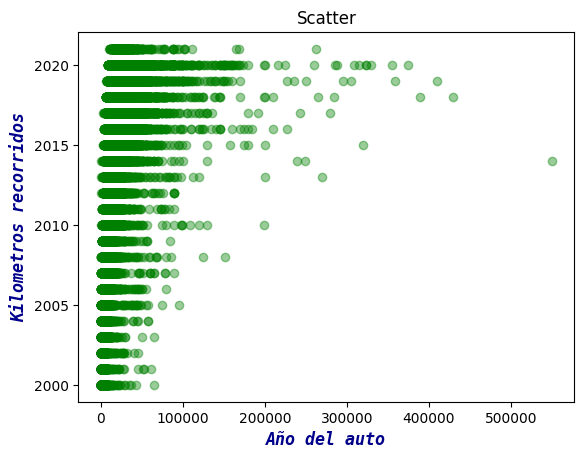

In [ ]:
plt.scatter(df_2['price'],df_2['year'], alpha=0.4, color = 'green')
fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'darkblue','size': 12}
plt.title('Scatter')
plt.xlabel('Año del auto', fontdict=fuenteejes)
plt.ylabel('Kilometros recorridos', fontdict=fuenteejes)

In [137]:
#Cargamos otras librerías

from sklearn.utils.fixes import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
import sys
import joblib
import warnings
warnings.filterwarnings("ignore")
sys.modules['sklearn.externals.joblib']= joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### ¿Que variables son las que mas importan?

Anteriormente pudimos ver que en la correlacion de las variables tenemos 2 con una alta correlacion por lo cual podria interferir en el entrenamiento del modelo. Por lo cual voy a eliminar uno de ellos dejando el que mejor se adapta a lo que buscamos en una **tercera copia** del dataframe original.

In [97]:
df_3 = df_2.drop(['year'], axis=1)

Se realizo la eliminacion de la **variable Year** para asi generar entrenamiento y pruebas de una **Regresion Logistica** con las variables **precio, puertas y kilometros**, donde la **variable target** sera **is_professional**,


In [130]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_3[['price', 'doors', 'kms']]
y = df_3['is_professional']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Crear un modelo de regresión logística y ajustarlo a los datos de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [132]:
# Realizar predicciones en el conjunto de prueba y evaluar el rendimiento del modelo
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

In [ ]:
print('MSE:', mean_squared_error(y_test, y_pred)) # error cuadrático medio
print('R²:', r2_score(y_test, y_pred)) #coeficiente de determinación

Podemos probar una arbol de decision y ver si este se adapta mejor a lo que buscamos

In [136]:
X = df_3[['kms', 'price', 'doors']].values
y = df_3['is_professional'].values

In [138]:
# Codificación de variables categóricas

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# Separación de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Creación del objeto de clasificación y ajuste del modelo
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.45416563527266174, 0.9895833333333334, 'x[1] <= 7820.0\ngini = 0.436\nsamples = 37892\nvalue = [12159, 25733]'),
 Text(0.1755142247331973, 0.96875, 'x[1] <= 3825.0\ngini = 0.443\nsamples = 11915\nvalue = [7976, 3939]'),
 Text(0.054391287743528235, 0.9479166666666666, 'x[1] <= 1855.0\ngini = 0.305\nsamples = 5847\nvalue = [4751, 1096]'),
 Text(0.007522332069770653, 0.9270833333333334, 'x[1] <= 1205.0\ngini = 0.147\nsamples = 2062\nvalue = [1897, 165]'),
 Text(0.003668851190970827, 0.90625, 'x[2] <= 2.5\ngini = 0.09\nsamples = 871\nvalue = [830, 41]'),
 Text(0.001699467854128176, 0.8854166666666666, 'x[1] <= 855.0\ngini = 0.145\nsamples = 280\nvalue = [258, 22]'),
 Text(0.0009596994940959113, 0.8645833333333334, 'x[0] <= 360000.0\ngini = 0.042\nsamples = 94\nvalue = [92, 2]'),
 Text(0.0006397996627306075, 0.84375, 'x[2] <= 1.5\ngini = 0.023\nsamples = 85\nvalue = [84, 1]'),
 Text(0.00047984974704795563, 0.8229166666666666, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(0.000

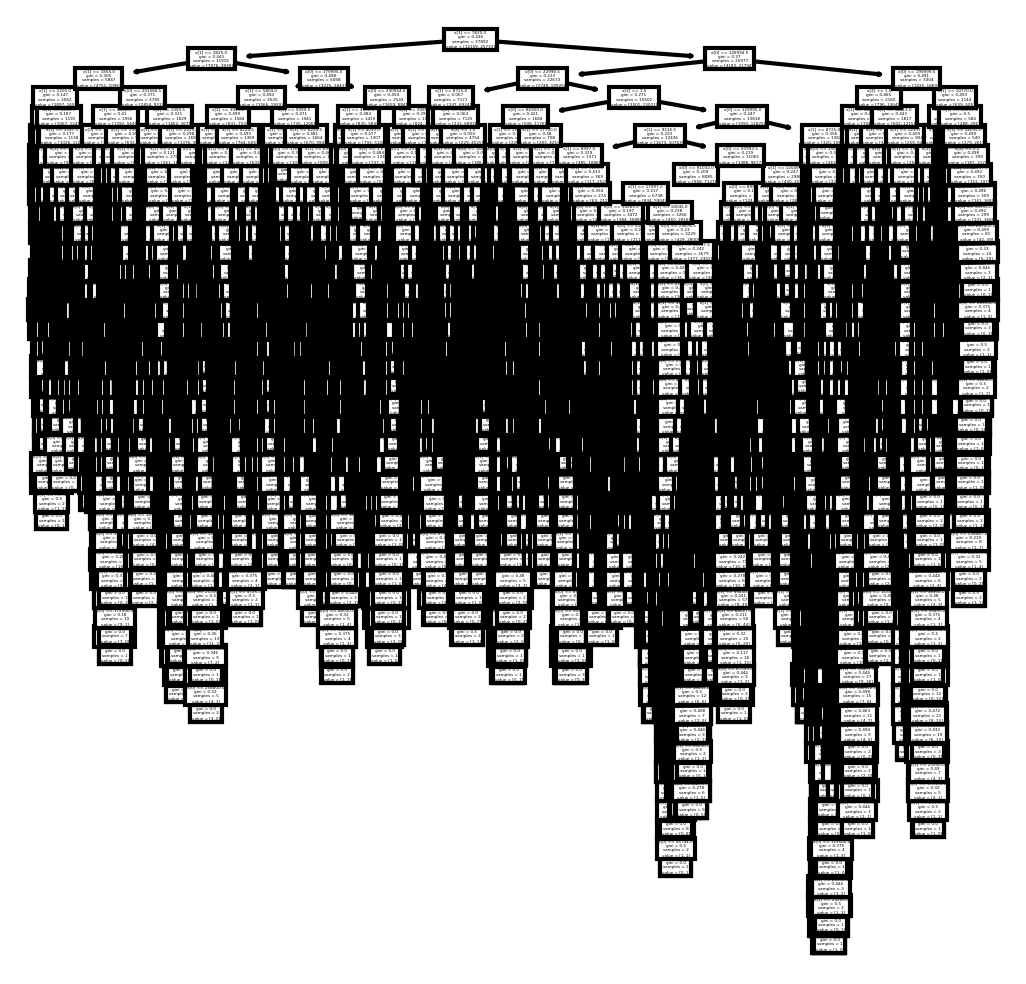

In [140]:
# Visualización del árbol de decisión
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(clf)

In [103]:
model = 'price~is_professional + fuel'
lm2    = sm.ols(formula = model, data = df_3).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     1084.
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        19:02:11   Log-Likelihood:            -5.2182e+05
No. Observations:               47365   AIC:                         1.044e+06
Df Residuals:                   47357   BIC:                         1.044e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [147]:
Q3 = df_3['price'].quantile(0.75) #busco los cuartiles, primero arranco por el cuartil superior

Q1 = df_3['price'].quantile(0.25) #continuo por el cuartil inferior

IQR = Q3-Q1 #creo una varible que contenga la resta de ambos para conocer el valor medio

upper = Q3+(1.5*IQR) #establezco maximos

lower = Q1-(1.5*IQR) #establezco minimos aceptados

(upper,lower)

data = df_3[(df_3['price']>lower) & (df_3['price']<upper)]

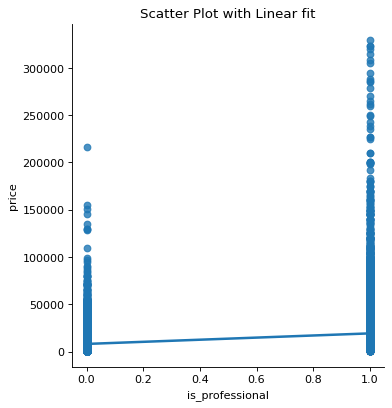

In [141]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':80})
sns.lmplot(x='is_professional', y='price', data=df_3)
plt.title("Scatter Plot with Linear fit");

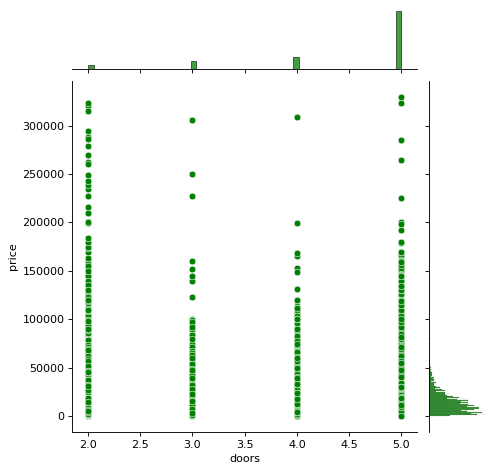

In [142]:
sns.jointplot(x=df_3["doors"], y=df_3["price"],color='green', kind='scatter')

In [143]:
def forward_selection(df_3, target, significance_level=0.01):
    initial_features = df_3.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.ols(target, sm.add_constant(df_3[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
!pip install mlxtend 

In [148]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

TypeError: ignored